In [1]:
# Import libraries
import numpy as np
import pandas as pd
import gensim
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from gensim.models import Word2Vec
import re
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
# Load the IMDb dataset
# Replace 'path/to/imdb-dataset.csv' with your actual path
df = pd.read_csv('IMDB Dataset.csv', encoding='latin-1')
df = df.sample(n=2000, random_state=42)  # sample for faster processing if needed

In [3]:
df

,review,sentiment
33553,I really liked this Summerslam due to the look...,positive
9427,Not many television shows appeal to quite as m...,positive
199,The film quickly gets to a major chase scene w...,negative
12447,Jane Austen would definitely approve of this o...,positive
39489,Expectations were somewhat high for me when I ...,negative
...,...,...
33582,Even though this movie starts off with the usu...,positive
31702,I thought that i wrote a comment on this movie...,positive
38237,When Sabrina first came onto our screens i was...,positive
22358,In print this is one of the greatest short sto...,positive


<Axes: title={'center': 'Distribution of Sentiments'}, xlabel='sentiment'>

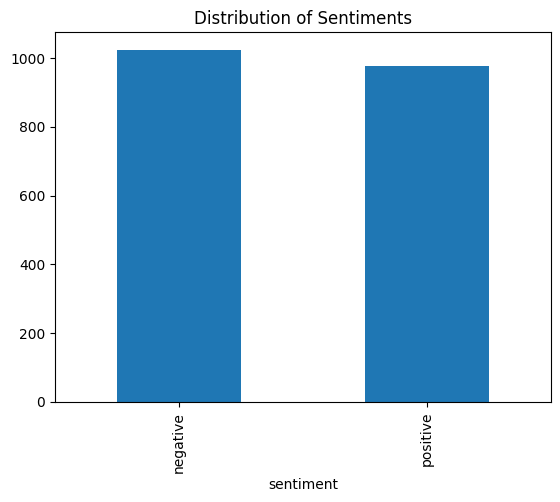

In [4]:
df['sentiment'].value_counts().plot(kind='bar', title='Distribution of Sentiments')

# Cleaning, Preprocessing, Tokenization Text

In [5]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download necessary NLTK resources (if you haven't already)
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Initialize the stemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Define the preprocessing function
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r"<.*?>", "", text)

    # Remove non-alphabetic characters
    text = re.sub(r"[^a-zA-Z]", " ", text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords and apply stemming
    processed_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]

    return processed_tokens

# Assuming df is your DataFrame containing the 'review' column
df['tokens'] = df['review'].apply(preprocess_text)

df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,review,sentiment,tokens
33553,I really liked this Summerslam due to the look...,positive,"[realli, like, summerslam, due, look, arena, c..."
9427,Not many television shows appeal to quite as m...,positive,"[mani, televis, show, appeal, quit, mani, diff..."
199,The film quickly gets to a major chase scene w...,negative,"[film, quickli, get, major, chase, scene, ever..."
12447,Jane Austen would definitely approve of this o...,positive,"[jane, austen, would, definit, approv, one, gw..."
39489,Expectations were somewhat high for me when I ...,negative,"[expect, somewhat, high, went, see, movi, thou..."
...,...,...,...
33582,Even though this movie starts off with the usu...,positive,"[even, though, movi, start, usual, someth, goe..."
31702,I thought that i wrote a comment on this movie...,positive,"[thought, wrote, comment, movi, find, anyway, ..."
38237,When Sabrina first came onto our screens i was...,positive,"[sabrina, first, came, onto, screen, therefor,..."
22358,In print this is one of the greatest short sto...,positive,"[print, one, greatest, short, stori, ever, wri..."


# Split data

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['tokens'], df['sentiment'], test_size=0.2, random_state=42)

# Train a Word2Vec model

In [7]:
w2v_model = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=2, sg=1)

#  Create sentence vectors by averaging word embeddings

In [8]:
def sentence_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Generate vectors for the training and test sets
X_train_vecs = np.array([sentence_vector(tokens, w2v_model) for tokens in X_train])
X_test_vecs = np.array([sentence_vector(tokens, w2v_model) for tokens in X_test])



In [9]:
X_train_vecs

array([[ 0.03350502,  0.18483259,  0.06047161, ..., -0.19395898,
        -0.06571931, -0.02791787],
       [-0.00760286,  0.18575098,  0.07745706, ..., -0.19225745,
        -0.05077925,  0.00695077],
       [ 0.00219036,  0.18159465,  0.05763979, ..., -0.16682826,
        -0.03630503,  0.00369402],
       ...,
       [-0.0065037 ,  0.18839309,  0.04691511, ..., -0.17916998,
        -0.01245565,  0.01482393],
       [ 0.00168442,  0.19357657,  0.06646749, ..., -0.16508234,
        -0.0441561 ,  0.01450587],
       [-0.01030763,  0.18408744,  0.06646582, ..., -0.15246153,
        -0.03014673,  0.01678244]], dtype=float32)

# Train a classifier

In [10]:
clf = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, random_state=42))
clf.fit(X_train_vecs, y_train)

# Evaluate the model
y_pred = clf.predict(X_test_vecs)
accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:", accuracy)

Test Accuracy: 0.73
